In [1]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install keras


  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 882.6 kB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 882.6 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 684.4 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 798.4 kB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 831.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
   ------- -------------------------------- 0.5/3.0 MB 1.3 MB/

In [102]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl (385.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\Yoan Rifqi\\Downloads\\Project Analysis Personal\\Dataset Saham Indonesia  Indonesia Stock Dataset\\.venv\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

#Modeling
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

import statsmodels.api as sm
from scipy import stats
import mplfinance as mpf
from plotly import tools
import matplotlib.dates as mdates
import chart_studio.plotly as py
import plotly.figure_factory as ff
import chart_studio.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from chart_studio.plotly import plot, iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
print(plt.style.available)

#Evaluation
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### 1. Forecasting Saham ADRO

##### Model Prophet

In [3]:
# Load data
adro = pd.read_csv("Stock/ADRO.JK.csv")

# Tambah Kolom Kode Saham
adro['Kode'] = 'ADRO'

# Tampilkan Data
adro

,Date,Open,High,Low,Close,Adj Close,Volume,Kode
0,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,ADRO
1,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,ADRO
2,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,ADRO
3,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,ADRO
4,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,ADRO
...,...,...,...,...,...,...,...,...
3960,2024-08-29,3540.0,3590.0,3500.0,3520.0,3520.000000,63218700.0,ADRO
3961,2024-08-30,3540.0,3590.0,3510.0,3560.0,3560.000000,95767700.0,ADRO
3962,2024-09-02,3590.0,3650.0,3570.0,3610.0,3610.000000,96348100.0,ADRO
3963,2024-09-03,NaN,NaN,NaN,NaN,NaN,NaN,ADRO


In [4]:
# Handle Missing Values
adro = adro.dropna()

# mengecek missing values
adro.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Kode         0
dtype: int64

In [5]:
# mengubah tipe data kolom 'Date' menjadi datetime
adro['Date'] = pd.to_datetime(adro['Date'], format="%Y-%m-%d")

# mengecek informasi dataset
adro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3963 entries, 0 to 3964
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3963 non-null   datetime64[ns]
 1   Open       3963 non-null   float64       
 2   High       3963 non-null   float64       
 3   Low        3963 non-null   float64       
 4   Close      3963 non-null   float64       
 5   Adj Close  3963 non-null   float64       
 6   Volume     3963 non-null   float64       
 7   Kode       3963 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 278.6+ KB


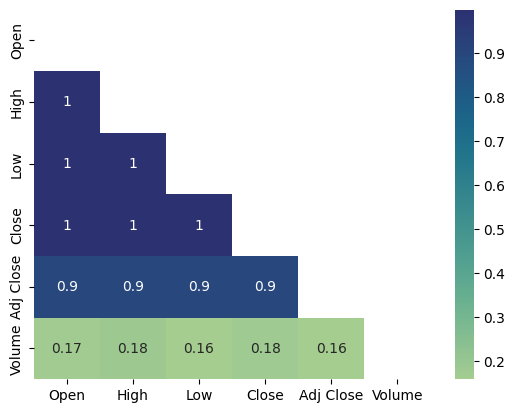

In [6]:
mask_adro = np.triu(np.ones_like(adro.corr(numeric_only=True))).astype(bool)
sns.heatmap(adro.corr(numeric_only=True), annot=True, mask=mask_adro, cmap='crest')
plt.show()

In [7]:
model = Prophet()

# Drop columns
model_df = adro.drop(['Open', 'High', 'Low', 'Volume', 'Kode', 'Adj Close'], axis=1)
model_df.rename(columns={'Close' : 'y', 'Date' : 'ds'}, inplace=True)

model_df

,ds,y
0,2008-08-01,1630.0
1,2008-08-04,1590.0
2,2008-08-05,1550.0
3,2008-08-06,1540.0
4,2008-08-07,1560.0
...,...,...
3959,2024-08-28,3530.0
3960,2024-08-29,3520.0
3961,2024-08-30,3560.0
3962,2024-09-02,3610.0


In [60]:
# Inisialisasi dan latih model dengan penyesuaian parameter
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality = 'auto'
)

# Latih model
model.fit(model_df)

22:40:31 - cmdstanpy - INFO - Chain [1] start processing
22:40:34 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
# Membuat tanggal prediksi
future_prices = model.make_future_dataframe(periods=365)

# prediksi harga
predict = model.predict(future_prices)
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4323,2025-08-31,4007.575839,3502.664777,4553.911020
4324,2025-09-01,3890.267596,3406.446108,4470.154621
4325,2025-09-02,3896.846411,3371.378534,4445.963567
4326,2025-09-03,3904.432237,3405.758580,4448.158727
4327,2025-09-04,3911.554875,3430.041940,4473.839018


In [63]:
df_actual.tail()

,ds,y_actual
3959,2024-08-28,3530.0
3960,2024-08-29,3520.0
3961,2024-08-30,3560.0
3962,2024-09-02,3610.0
3964,2024-09-04,3560.0


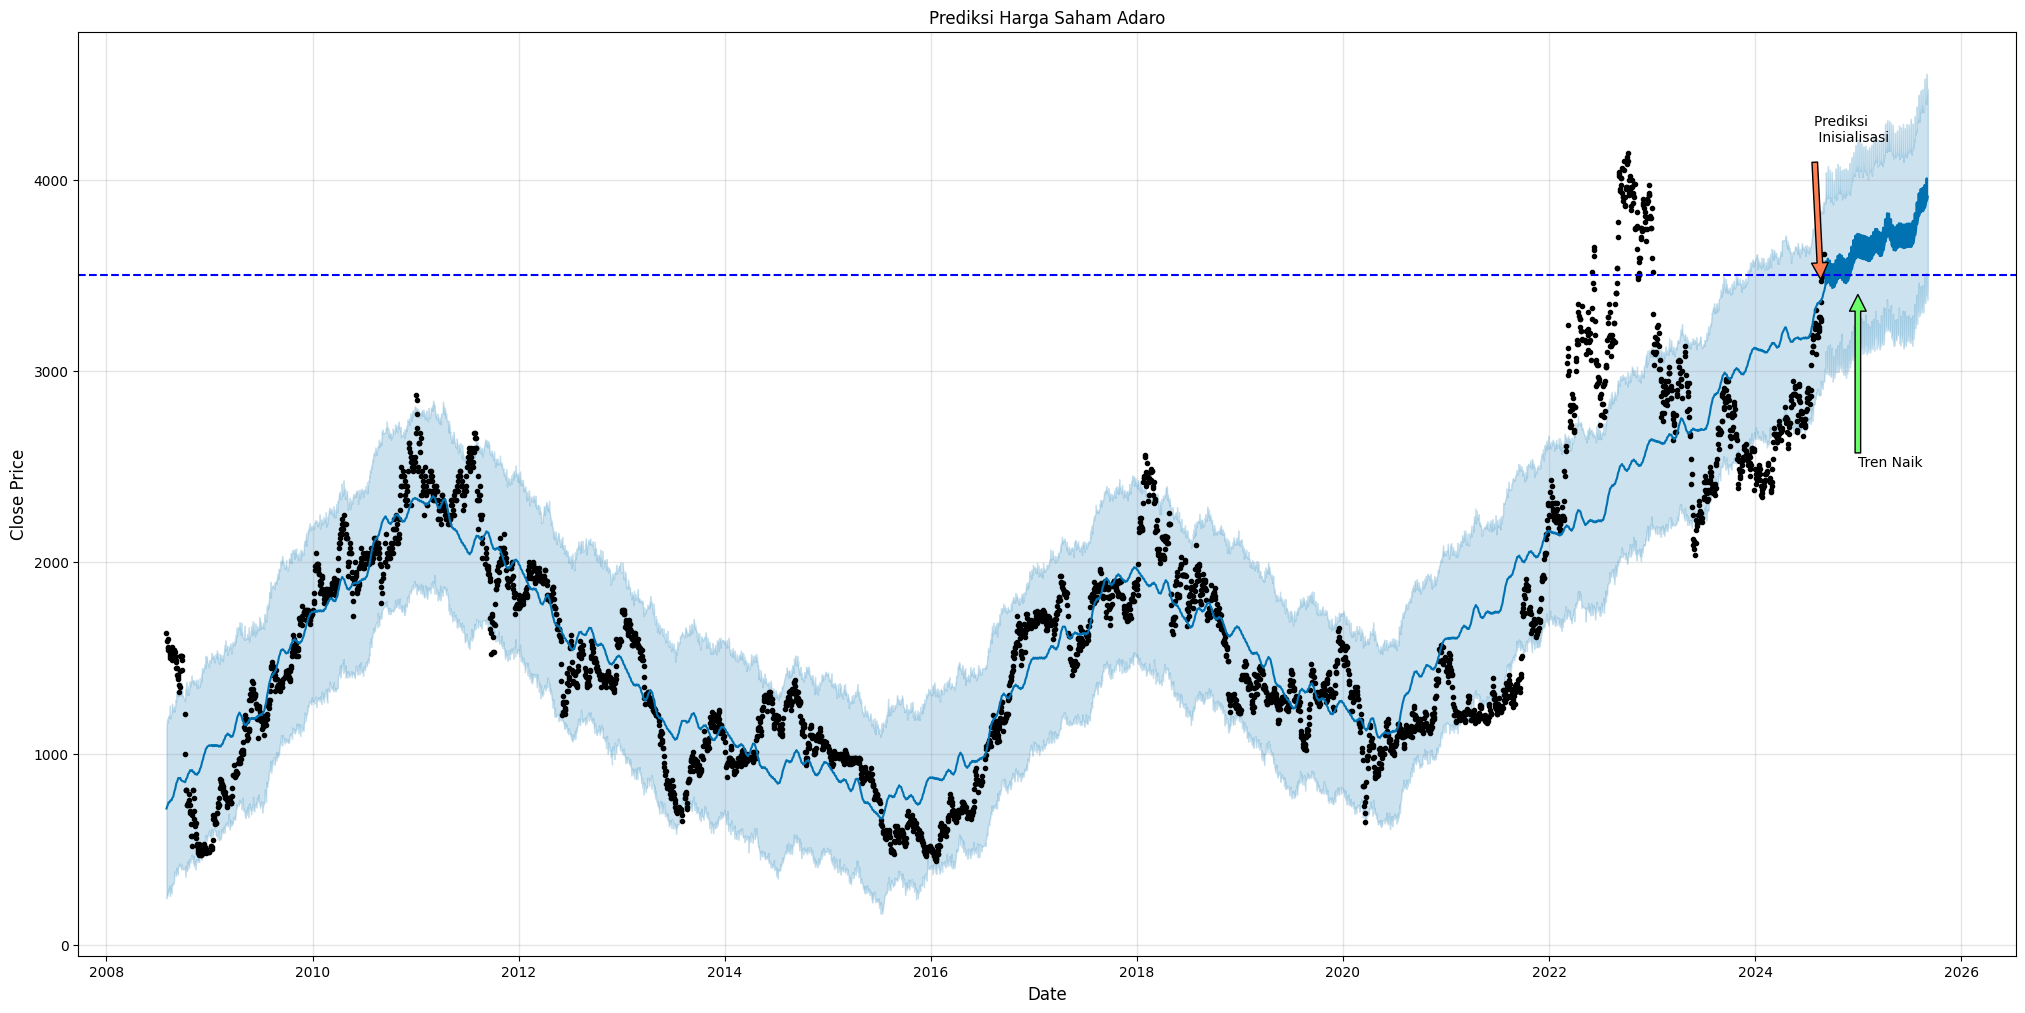

In [65]:
# Dates
start_date = dt.datetime(2024, 7, 27)
start_date1 = mdates.date2num(start_date)

trend_date = dt.datetime(2024, 12, 30)
trend_date1 = mdates.date2num(trend_date)

point_arrow = dt.datetime(2024, 8, 23)
point_arrow1 = mdates.date2num(point_arrow)

# plot
fig, ax1 = plt.subplots(figsize=(25, 12))
model.plot(predict, ax=ax1)
ax1.set_title('Prediksi Harga Saham Adaro')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Close Price', fontsize=12)

# anotasi
ax1.annotate('Prediksi \n Inisialisasi', xy=(point_arrow1, 3400), xytext=(start_date1, 4200), 
             arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
             )
ax1.annotate('Tren Naik', xy=(trend_date1, 3400), xytext=(trend_date1, 2500), 
             arrowprops=dict(facecolor='#6cff6c', shrink=0.0),
             )

ax1.axhline(y=3500, color='b', linestyle='--')
plt.show()

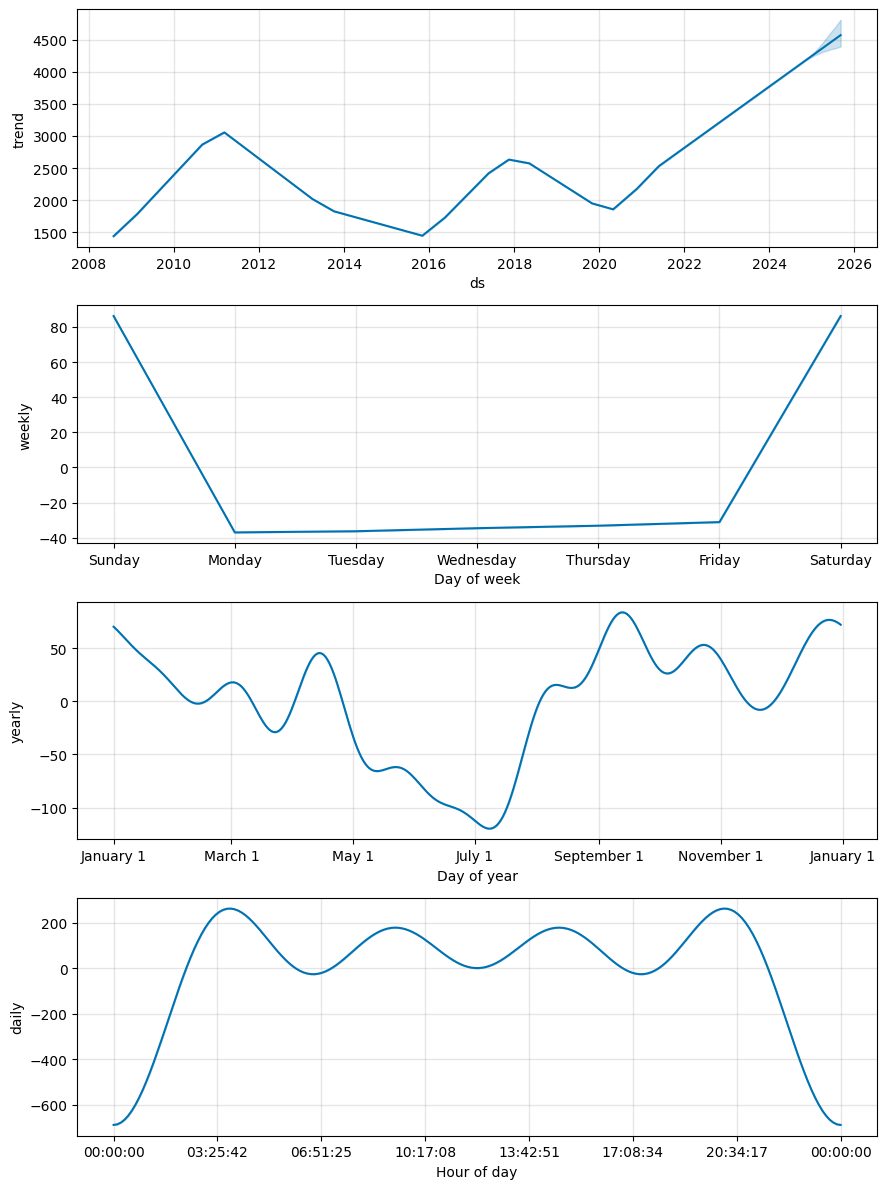

In [66]:
fig2 = model.plot_components(predict)
plt.show()

In [75]:
#Melakukan Crossvalidation dengan training data 5753 (>15 tahun), prediksi 180 (6 bulan) dan interval waktunya 120 (3 bulan)
cv_adro = cross_validation(model, initial='5753 days', period='180 days', horizon = '120 days')

  0%|          | 0/1 [00:00<?, ?it/s]

22:45:50 - cmdstanpy - INFO - Chain [1] start processing
22:45:52 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
# Melihat hasil cross validation
cv_adro.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
74,2024-08-28,3539.223987,3066.250334,3948.162762,3530.0,2024-05-07
75,2024-08-29,3545.558882,3099.263704,4009.567103,3520.0,2024-05-07
76,2024-08-30,3552.059886,3069.474709,4038.602525,3560.0,2024-05-07
77,2024-09-02,3563.894003,3118.238448,4025.208482,3610.0,2024-05-07
78,2024-09-04,3579.275412,3117.787612,4045.792249,3560.0,2024-05-07


In [80]:
# Melihat performance metrics
pm_adro = performance_metrics(cv_adro)
pm_adro.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,13 days,172852.345209,415.755151,414.173805,0.143686,0.143864,0.133974,0.857143
1,14 days,176257.092057,419.829837,418.173596,0.145004,0.147866,0.135117,0.857143
2,15 days,183186.818904,428.003293,427.472177,0.148358,0.147866,0.138082,0.857143
3,20 days,188849.489947,434.568165,433.951118,0.150687,0.149563,0.140094,0.714286
4,21 days,215841.220096,464.587150,458.232785,0.160950,0.149563,0.148560,0.714286


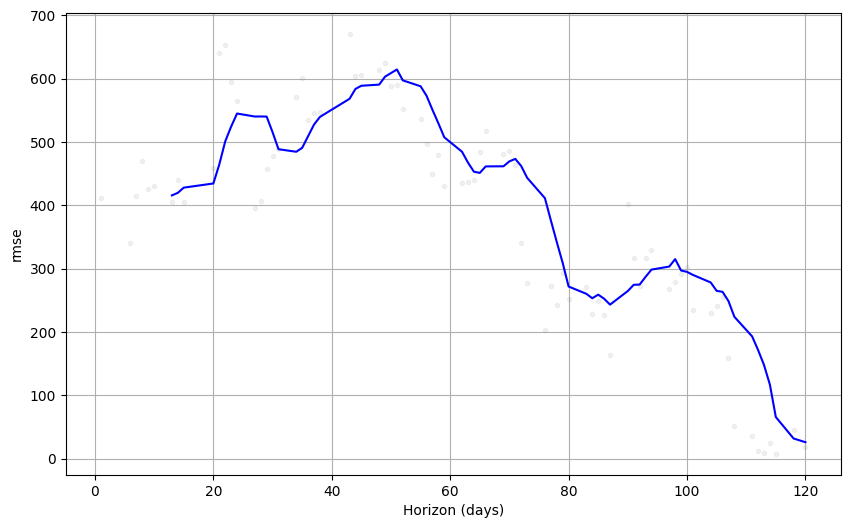

In [81]:
# Visualiasi RMSE
plot_cross_validation_metric(cv_adro, metric='rmse')
plt.show()

##### Model LSTM

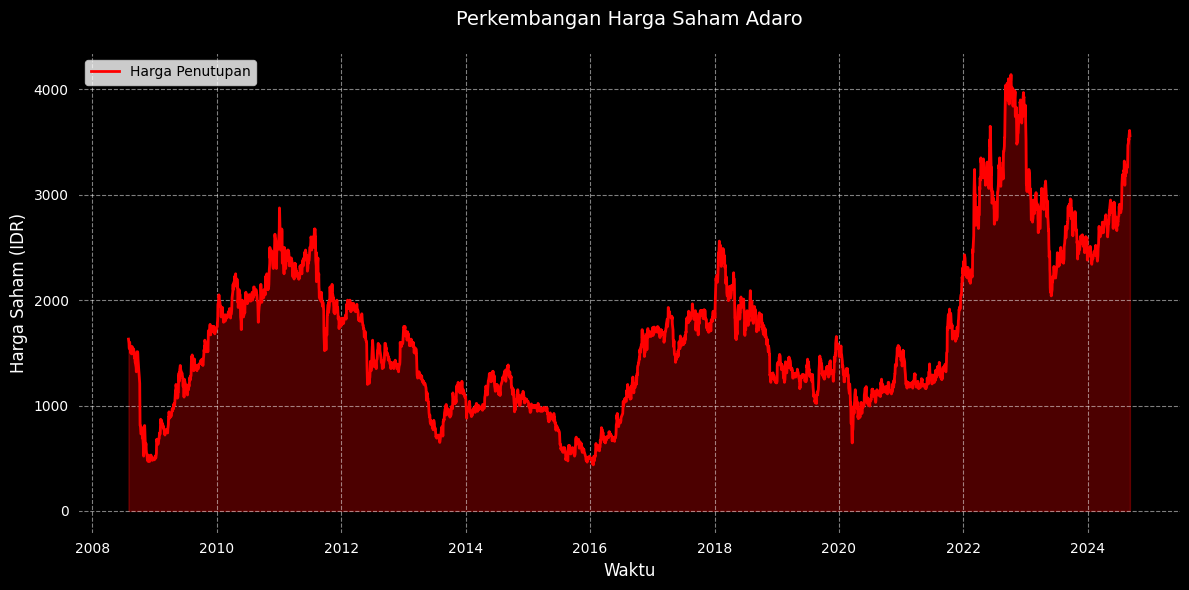

In [89]:
# Pastikan 'Date' dalam format datetime
adro['Date'] = pd.to_datetime(adro['Date'])

# Membuat grafik area
plt.figure(figsize=(12, 6))

# Menambahkan area untuk harga penutupan
plt.plot(adro['Date'], adro['Close'], color='red', linewidth=2, label='Harga Penutupan')
plt.fill_between(adro['Date'], adro['Close'], color='red', alpha=0.3)  # Mengisi area di bawah garis merah

# Mengatur layout plot
plt.title('Perkembangan Harga Saham Adaro', fontsize=14, color='white', pad=20)
plt.xlabel('Waktu', fontsize=12, color='white')
plt.ylabel('Harga Saham (IDR)', fontsize=12, color='white')

# Mengatur sumbu x dan y
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.5)

# Mengatur background
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [93]:
# Create a new dataframe with only the 'Close' column 
data_adro = adro.filter(['Close'])

# Convert the dataframe to a numpy array
adro_df = data_adro.values

# Get the number of rows to train the model on (80% of the dataset)
training_data_len = int(np.ceil(len(adro_df)) * 0.80)

training_data_len

3170

In [94]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adro_df)

scaled_data

array([[0.32217121],
       [0.31136916],
       [0.30056711],
       ...,
       [0.84337024],
       [0.85687281],
       [0.84337024]])

In [95]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.32217121, 0.31136916, 0.30056711, 0.29786659, 0.30326762,
       0.31406967, 0.29786659, 0.28976506, 0.28706454, 0.29246557,
       0.29516608, 0.28436403, 0.29516608, 0.29516608, 0.30326762,
       0.29786659, 0.29786659, 0.29516608, 0.29516608, 0.29786659,
       0.29516608, 0.28976506, 0.28166352, 0.28436403, 0.27356198,
       0.27356198, 0.26275992, 0.26275992, 0.26005941, 0.2573589 ,
       0.24925736, 0.23845531, 0.24655685, 0.26816095, 0.28976506,
       0.28976506, 0.28976506, 0.28976506, 0.28436403, 0.27086146,
       0.20874966, 0.15203889, 0.10072914, 0.10072914, 0.10072914,
       0.07912503, 0.07912503, 0.07912503, 0.08182555, 0.08182555,
       0.09532811, 0.08722657, 0.07912503, 0.06832298, 0.07102349,
       0.0521199 , 0.03591682, 0.02241426, 0.03591682, 0.06562247])]
[0.10072913853632191]

[array([0.32217121, 0.31136916, 0.30056711, 0.29786659, 0.30326762,
       0.31406967, 0.29786659, 0.28976506, 0.28706454, 0.29246557,
       0.29516608, 0.28436403, 0.29

In [4]:
pip install tensorflow==2.14.0

  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp311-cp311-win_amd64.whl.metadata (6.9 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl (284.2 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
Using cached wrapt-1.14.1-cp

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\Yoan Rifqi\\Downloads\\Project Analysis Personal\\Dataset Saham Indonesia  Indonesia Stock Dataset\\.venv\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

ModuleNotFoundError: No module named 'tensorflow.python'

#### 2. Forecasting Saham BUMI

#### 3. Forecasting Saham BYAN

#### 4. Forecasting Saham GEMS

#### 5. Forecasting Saham INDY

#### 6. Forecasting Saham ITMG

#### 7. Forecasting Saham PTBA